<a href="https://colab.research.google.com/github/GitWahome/Machine-Learning/blob/master/Assignment_5_CS156.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UTILITY FUNCTIONS**

Here I import all the packages I need. The denistyFit() function takes in the dataset we are working with, the criteria of evaluation be it by day, month, monthyear etc, and the size of the sample we want to get from the density estimator. I set them up this way to facilitate reuse of the function as both an estimator. The size of the sample generated for the days is dependent on the number of transactions for the month my initial estimator tells me. This will be used to generate the fake month. 

I blocked the stdAmount, which is short for standard amount. The idea is to keep the amounts in blocks of 1000. I know I abstract a lot of data which is less than 1000. I set all of them as 1000$. This allowed for easy categirization when the criteria was size of transaction, but worry not, I made sure to also retail the original amounts and made use of these when generating fake transactions later on. I have a gut feeling that if I stratified the data, and used the <1000, It would show a similar property to the bigger dataset. Nonetheless, the size of the data is sufficient to go by this binning strategy.

In [1]:
import pandas as pd
import math
import random
from IPython.display import display, HTML
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
matplotlib.style.use('ggplot')

tranData = pd.read_csv('https://course-resources.minerva.kgi.edu/uploaded_files/mke/Y5GZpr/anonymized.csv')
day,month, year, monthYear, stdAmount = [],[],[], [], []
for i in range(len(tranData)):
  d = tranData.loc[i]['Date']
  day.append(d[:2])
  monthYear.append(d[2:])
  month.append(d[2:5])
  year.append(d[5:])
  stdAmount.append(math.ceil(abs(int(tranData.loc[i]['Amount']))/1000.0)*1000) #Binning of transactions

for i in range(len(stdAmount)):#Replaced 0 transactions with 1000. I use the absolute value for transaction size since it doesnt matter if it is a withdrawal or deposit.
  if stdAmount[i] == 0:
    stdAmount[i] = 1000
tranData['day'],tranData['month'],tranData['year'], tranData['monthYear'],tranData['stdAmount'] = day,month, year, monthYear, stdAmount
display(tranData.head(10))  #As you can see, I still retain the original transaction sizes   under Amount 
def densityFit(countData, criteria, samSize):
  print("The amount shows the counts in this function")
  display(countData[['Amount']].head())
  kde = KernelDensity(kernel='gaussian', bandwidth=4).fit(countData.Amount.as_matrix().reshape((-1, 1)))
  x_range = np.linspace(min(countData['Amount']), max(countData['Amount']), len(range(min(countData['Amount']), max(countData['Amount'])))).reshape((-1, 1))
  y_density = np.exp(kde.score_samples(x_range))
  axes = countData.hist('Amount', bins=15, normed=True, figsize=(12, 9))[0][0]
  axes.plot(x_range, y_density, color='blue', label='Fit density')

  plt.legend(loc=1, fontsize=16)
  plt.xlabel('Number of transactions by {}'.format(criteria), size=16)
  plt.ylabel('Frequency Density', size=16)
  plt.title("Frequency distribution of counts by {}".format(criteria))
  plt.show()
  return kde.sample(samSize)
print("################################################################################################################")

,Date,Amount,day,month,year,monthYear,stdAmount
0,25May2016,54241.35,25,May,2016,May2016,55000
1,29May2017,54008.83,29,May,2017,May2017,55000
2,30Jun2017,54008.82,30,Jun,2017,Jun2017,55000
3,05Jan2017,52704.37,05,Jan,2017,Jan2017,53000
4,23Feb2017,52704.36,23,Feb,2017,Feb2017,53000
5,04Nov2016,52000.00,04,Nov,2016,Nov2016,52000
6,28Sep2017,49878.83,28,Sep,2017,Sep2017,50000
7,04Apr2017,49878.82,04,Apr,2017,Apr2017,50000
8,25Jul2017,49878.82,25,Jul,2017,Jul2017,50000
9,24Aug2017,49878.82,24,Aug,2017,Aug2017,50000


################################################################################################################


This call evaluates the counts of transactions based on the month Year. This is the cumulative month count with the first month being January 2014, going all the way to December 2017. The number of transactions are evaluated for each month. We samle the number of transactions for our fake month through this.

################################################################################################################
The amount shows the counts in this function


,Amount
monthYear,
Apr2014,33
Apr2015,51
Apr2016,32
Apr2017,78
Aug2014,41


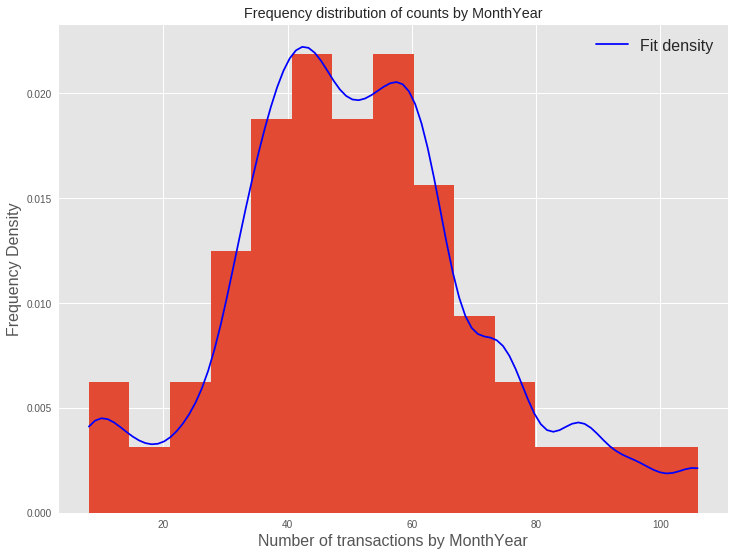

Four our sample month, we take about 67 transactions for that Month
################################################################################################################


In [2]:
print("################################################################################################################")
numMonthTransactions = int(densityFit(tranData.groupby('monthYear').count(), criteria = "MonthYear", samSize = 1)[0][0])
print("Four our sample month, we take about {} transactions for that Month".format(numMonthTransactions))
print("################################################################################################################")

This is a variant of the one above. I wanted to be safe so I also did an evaluation of the counts keeping the months constant. The counts span 3 years so this evaluation is cumulative by count. It would make more sense to use the average over 3 years for this but since this is but a scaling factor, the shape of the distribution by month ought to stay the same.

################################################################################################################
The amount shows the counts in this function


,Amount
month,
Apr,194
Aug,198
Dec,251
Feb,195
Jan,243


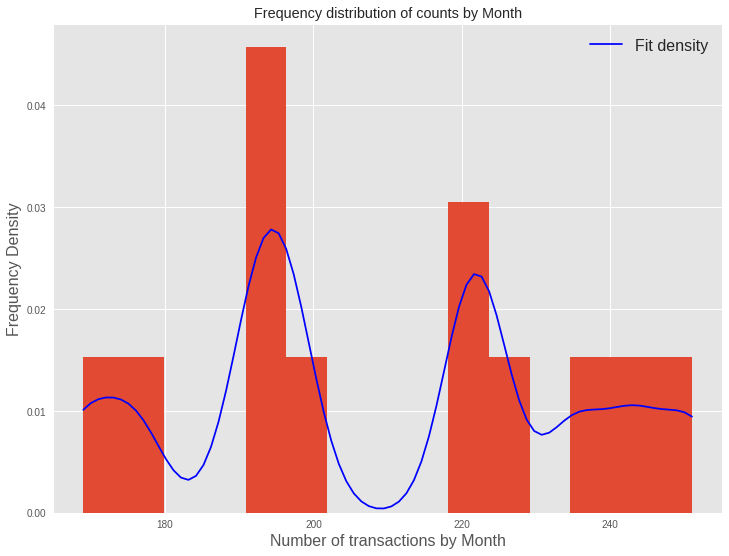

################################################################################################################


In [3]:
print("################################################################################################################")
samMonths = densityFit(tranData.groupby('month').count(), criteria = "Month", samSize = 12)
monthRef = dict(enumerate(["Jan","Feb","Mar", "Apr", "May","Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]))
numMonth = [int(month[0]) for month in samMonths]
numMonthStr = []
for i in range(0, 12):
  numMonthStr+=["{}".format(monthRef[i])]*numMonth[i]
sampleMonth = numMonthStr
print("################################################################################################################")

This gives us the distribution of transactions by day over the three years. Again, this is cumulative over 3 years but the shape of the distribution should be retained year to year.

################################################################################################################
The amount shows the counts in this function


,Amount
day,
01,128
02,70
03,92
04,60
05,68


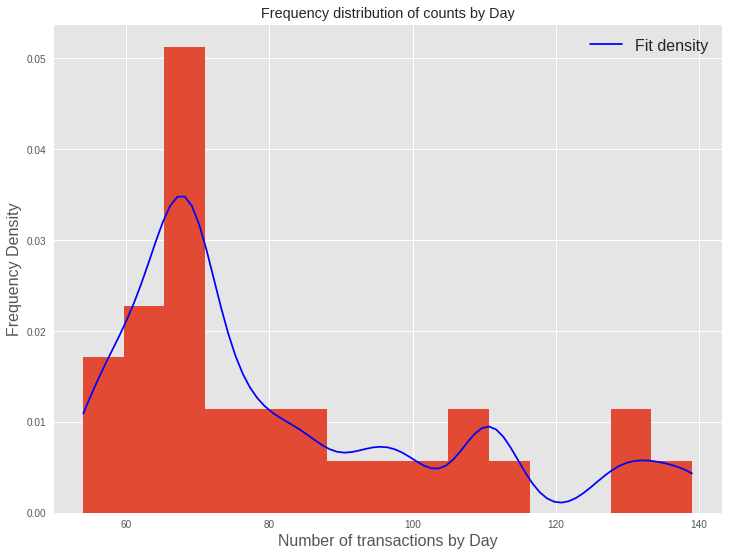

################################################################################################################


In [4]:
print("################################################################################################################")
numDailyTransactions = densityFit(tranData.groupby('day').count(), criteria = "Day", samSize =31)
numDaily = [int(day[0]) for day in numDailyTransactions]
numDayStr = []
for i in range(0, 31):
  numDayStr+=["{}".format(i+1)]*numDaily[i]
sampleDays = numDayStr
print("################################################################################################################")

This was not the prettiest distribution so I printed the dataframe too. The size of the transaction does indeed scale logarithmically with smaller transactions being the bulk. i have a lot of data abstracted under the thousands block I must admit.hence why there is a massive block that makes the rest of them tiny relative to it. I never implemented the log scale since Im out of extensions, the African in me had to do this last minute sadly but I promise to implement it by the time you see this, it will be in the git repo asap. The big question however is Bentfor'd hence this did not necessarily hinder me from infering this.

################################################################################################################
The amount shows the counts in this function


,Amount
stdAmount,
1000,1770
2000,272
3000,75
4000,57
5000,48


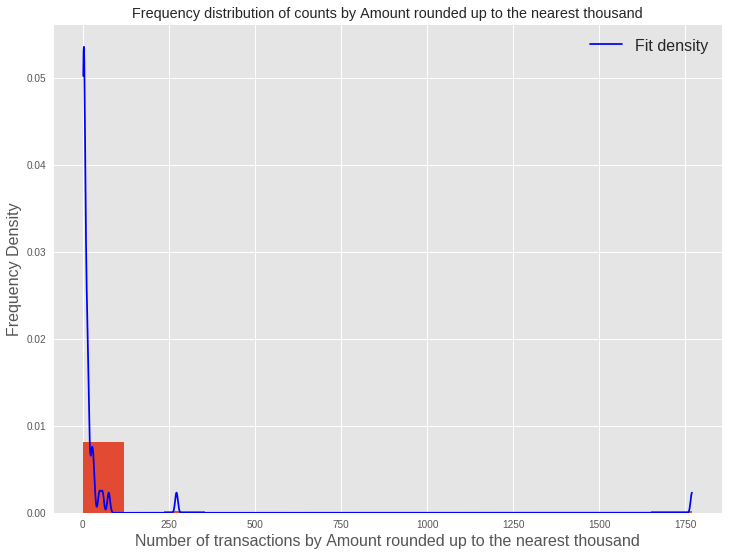

################################################################################################################


In [5]:
print("################################################################################################################")
sampleAmount = densityFit(tranData.groupby('stdAmount').count(), criteria = "Amount rounded up to the nearest thousand",samSize = numMonthTransactions )
sampleMonthlyTrans = [tran[0]*1000 for tran in sampleAmount]
print("################################################################################################################")

Here, I started compiling our fake month. Let me detail the logic in this.

So for the days, the sample gave us a count for the number of transactions by day. What I did up there was compile a list of days  corresponding to the counts of transactions. The idea is to encode the probaility of transactions happening is the specific days. The list of days I will have will have a distribution corresponding to the number of transactions. 

The same is done for the month, I have a number of transaction by month which I used to encode the probablity of months from the transactiosn.

With these, if I  randomly selected day or month, the likelyhood of that month being the one in which the transaction will be as per the probability of a transaction happening in that month. My assumption is that the random choice selector in python is fair..

I go ahead to assign days to the generated random transactions from our sampler.  The aim is to keep the fake month similar to our other months. While the probability may not be accurate at all time, if we sample many times, then by CLT it should reflect the original days as per the transaction ratios. 

I did not need to evaluate the same for the year since I am merely generating one fake month. If you asked me to generate the year, it would be a similar process, the functions I have made are capable of appending the values to give us a whole month or year with a little tweaking as needded.

I printed just the head of the month but I think the idea is apparent, the days are not assigned uniformly, they are assigned as per their likelihood of occurence in the list that is based on the number of transactions by day.

In [6]:
sampleMonthTransactions = {"day":[], "Amount":[]}
def sampleMonth(sampleDays = sampleDays, sampleMonthlyTrans =sampleMonthlyTrans):
  for trans in sampleMonthlyTrans:
    sampleDay = random.choice(sampleDays)
    sampleMonthTransactions["day"].append(sampleDay)
    sampleMonthTransactions['Amount'].append(trans)  
  sampleMS = pd.DataFrame(sampleMonthTransactions)
  print("Just a sample of the generared monthly transactions")
  display(sampleMS.head(10))
  return sampleMS
print("################################################################################################################")
fakeMonth = sampleMonth()

################################################################################################################
Just a sample of the generared monthly transactions


,Amount,day
0,5970.414490,27
1,-2091.579493,12
2,12966.784282,6
3,2754.258650,17
4,9778.756138,11
5,10326.797116,31
6,278104.999657,29
7,9833.183719,10
8,1765.678208,11
9,9877.236376,11


I created a utility function to show the frequency distibution of the transactions generated, IE the transaction amounts generated for our fake month. The distribution is of the first numbers of the transactions. I absoluted the transactions since it did not mattter whether they are withdrawals or deposits. I then stringified and took the first index value to get our number. I evaluated over 1-9.

I also print the proportions of the values after to see if they follow Benford's law.

################################################################################################################


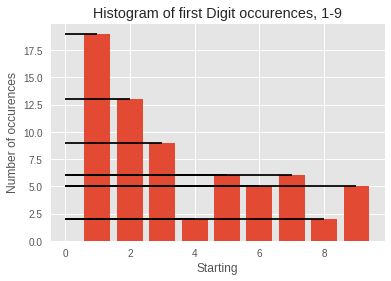

,Starting Digit,Proportion
0,1,28.35820895522388 %
1,2,19.402985074626866 %
2,3,13.432835820895523 %
3,4,2.9850746268656714 %
4,5,8.955223880597014 %
5,6,7.462686567164178 %
6,7,8.955223880597014 %
7,8,2.9850746268656714 %
8,9,7.462686567164178 %


################################################################################################################


In [7]:
print("################################################################################################################")
def Benford(transactions):
  absStr = [int(str(abs(tran))[0]) for tran in transactions["Amount"]]
  counts = [absStr.count(vals) for vals in range(1,10,1)]
  countsProportion = [(c+1,"{} %".format(counts[c]/sum(counts)*100)) for c in range(len(counts))]
  x = list(range(1,10,1))
  plt.title("Histogram of first Digit occurences, 1-9")
  plt.bar(x,counts,align='center') # A bar chart
  plt.xlabel('Starting')
  plt.ylabel('Number of occurences')
  for i in range(len(counts)):
      plt.hlines(counts[i],0,x[i]) # Here you are drawing the horizontal lines
  plt.show()
  df = pd.DataFrame(countsProportion)
  df = df.rename(columns={0: 'Starting Digit', 1: 'Proportion'})
  display(df)
  
Benford(fakeMonth)
print("################################################################################################################")

From the data above, it seems like we have some hella convincing generated amounts. I ran this a number of times and it consistently generated samples that followed the law. The first figit, 1, consistently fell between 25-35% of the frequency, the second 15-20 and so on.  It was an exponential curve pretty much every time which made me really happy that I can pose as a fake Elon Musk.



I have to note though, the fact that my transactions were independent of the year was concerning. This assumed that the owner of the transactions never got wealthier, I am not considering that they got poorer, gotta be optimistic. In this regard, I abstract the expected rise in the magnitude and frequency of transactions that would be expected should they get wealthier or poorer. In this regard, if I compared the generated transactions and the recent transactions, there should be a discrepancy that tells me these are fake.

The probabilities I encode are supposed to help me maximize the likelihood that the days that I assign the generated transactions is the day that those transactions happen. This is because I try and infer the probablilty that our user will withdraw at any specific day. This assumption assumes this stayed consistent over the three years but I doubt this would be the case. Extensive stratification would reflect different patterns of transactions. I would want to compare transaction for this month and the ones of the previous 3 or 4 months. The transaction rate and magnitude and subsequently the probabilites of transactions for my days should mainly be influenced by the fluctuation of income. if I assumed had constant income the past 3 years and their lifestyle stayed pretty much the same, then my inference would be sensible. I expect though that their lifestyle improved, they started spending da dollar before thanos snapped and so this rate in my false month would be out of place if I monitored the transaction trend over the past few months.

Finally, I have to note something that I think I captured quite well, lets assume the lifestyle stayed the same, if Musk is say a Christian, then we expect more transactions during Sundays and such. We generally expect mor etransactions during the weekends. By encoding the probability of days based on the transactions, I captured the spending habits quite well. In fact, I think the thing affected most by the increased income would be the magnitude of transactions and not the rate. They would just have bigger withdrawals the same if not less times but I assume this stays rroughly constant. In this regard, if the auditor was monitoring our spending habit, we actually might get away with our transaction fraud.